<a href="https://www.kaggle.com/code/muaadhsh/house-price-prediction?scriptVersionId=117861803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Prices Predictions
## Summary
This kaggle competition provides a dataset describing aspects that influence house pricing in Ames, Iowa. 
## Task
The goal is to use the provided data to predict prices for each home using regression techniques.

## Data description
The data can be found at [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview).
The data is formed of two csv files that are:
- train.csv - the training set.
- test.csv - the test set. <br />

The dataset has 79 variables that influence the final prices that can be found under data fields at [Dataset Description](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA and data transformation
Let's start by importing the dataset and have a look on its structure and data types.

In [2]:
# Import and preview the training dataset
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Clearly we have numerical and categorical values.

In [4]:
# Import and preview the training dataset
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

For starters, we'll import the datasets into new variables that we will use to modify the data. 

In [6]:
train_enc = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_enc = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

Checking for duplicates in the dataset

In [7]:
# Count duplicates in the training set (True = duplicated)
train.duplicated().value_counts()

False    1460
dtype: int64

In [8]:
# Count duplicates in the testing set(True = duplicated)
test.duplicated().value_counts()

False    1459
dtype: int64

There are no dublicates in the dataset. Next, let's have a look on the missing data.

In [9]:
pd.set_option('display.max_rows', None) # Display all rows in the output

Let's analyze and handle the missing data.

In [10]:
# creating a table of missing values and their counts.
missing = pd.DataFrame(train.isnull().sum().sort_values(ascending = False))
percentage = pd.DataFrame(train.isnull().sum()/train.isnull().count().sort_values(ascending = False))
missing_data = pd.concat([missing, percentage], axis = 1, keys = ['Missing values', "Percentage"])
missing_data.head(25)

,Missing values,Percentage
,0,0
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


Let's review the data with 20% missing values and above:  
- N/A in PoolQC indicates no Pool. Since that is not a metric of quality and it represent ~99% of the data I'm inclined to drop this column.
- N/A in MiscFeature indicates none of the mentioned features. By reviewing the data I'd consider this column is random and full of missig data, therefore I think it's better to be dropped.
- N/A in Alley indicates no alley. This feature does not have a high impact on the problem and ~93% of the time is missing hence it should be dropped as well.
- N/A in Fence indicates no fence. Since this column contains fence quality and no fence represent ~80% I will drop this column.
- N/A in FirePlaceQu indicates no fireplace. ~47% is missing hence we will drop it.

In [11]:
# Apply the changes to both training and testing sets.
train_enc.drop(['PoolQC'], axis = 1, inplace = True )
test_enc.drop(['PoolQC'], axis = 1, inplace = True )

train_enc.drop(['MiscFeature'], axis = 1, inplace = True )
test_enc.drop(['MiscFeature'], axis = 1, inplace = True )

train_enc.drop(['Alley'], axis = 1, inplace = True )
test_enc.drop(['Alley'], axis = 1, inplace = True )

train_enc.drop(['Fence'], axis = 1, inplace = True )
test_enc.drop(['Fence'], axis = 1, inplace = True )

train_enc.drop(['FireplaceQu'], axis = 1, inplace = True )
test_enc.drop(['FireplaceQu'], axis = 1, inplace = True )

Next in the list we have LotFrontage missing values. Let's try to search for a way to fill the null values.

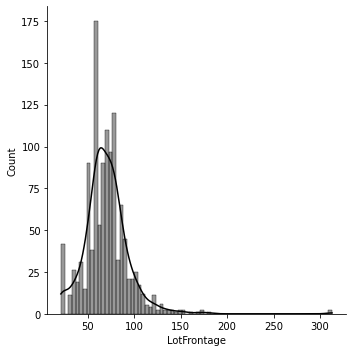

In [12]:
# Plotting lot frontage distribution
sns.displot(train['LotFrontage'], kde = True, color = 'black', alpha = 0.4 );

The distribution is positively skewed. Therefore we will use median imputation to replace the missing values.

In [13]:
# Fill the null values in LotFrontage with the median
med = train_enc["LotFrontage"].median()
train_enc["LotFrontage"].fillna(med , inplace = True)
test_enc["LotFrontage"].fillna(med , inplace = True)

Next let's check missing values for GarageXXX features.

In [14]:
# Checking correlation
train['YearBuilt'].corr(train['GarageYrBlt'])

0.825667484174342

We can find high correlation between YearBuilt and GarageYrBlt. Also the missing values are for the properties with no garage. Hence, dropping GarageYrBlt is my preferable action. For the rest of GarageXXX features we'll just replace the missing values with "No_Gr". Since the null values are ~5% this will not make a big impact on the final results. <br/>

In [15]:
train_enc.drop(['GarageYrBlt'], axis = 1, inplace = True )
test_enc.drop(['GarageYrBlt'], axis = 1, inplace = True )

train_enc["GarageType"].fillna("No_Gr", inplace = True)
test_enc["GarageType"].fillna("No_Gr", inplace = True)

train_enc["GarageFinish"].fillna("No_Gr", inplace = True)
test_enc["GarageFinish"].fillna("No_Gr", inplace = True)

train_enc["GarageQual"].fillna("No_Gr", inplace = True)
test_enc["GarageQual"].fillna("No_Gr", inplace = True)

train_enc["GarageCond"].fillna("No_Gr", inplace = True)
test_enc["GarageCond"].fillna("No_Gr", inplace = True)

For BsmtXXX features, ~2% of the values are null which indicate no basement. Since it has categorical features, we will replace the null values with "No_bsmt". We will also replace MasVnrType features with "None" MasVnrArea with 0, and replace the one missing value in Electrical with "SBrkr" since over 90% have that electrical type.<br/>


In [16]:
train_enc["BsmtQual"].fillna("No_Bsmt", inplace = True)
test_enc["BsmtQual"].fillna("No_Bsmt", inplace = True)

train_enc["BsmtCond"].fillna("No_Bsmt", inplace = True)
test_enc["BsmtCond"].fillna("No_Bsmt", inplace = True)

train_enc["BsmtExposure"].fillna("No_Bsmt", inplace = True)
test_enc["BsmtExposure"].fillna("No_Bsmt", inplace = True)

train_enc["BsmtFinType1"].fillna("No_Bsmt", inplace = True)
test_enc["BsmtFinType1"].fillna("No_Bsmt", inplace = True)

train_enc["BsmtFinType2"].fillna("No_Bsmt", inplace = True)
test_enc["BsmtFinType2"].fillna("No_Bsmt", inplace = True)

train_enc["MasVnrType"].fillna("None", inplace = True)
test_enc["MasVnrType"].fillna("None", inplace = True)

train_enc["MasVnrArea"].fillna(0 , inplace = True)
test_enc["MasVnrArea"].fillna(0 , inplace = True)

train_enc["Electrical"].fillna("NBrkr", inplace = True)
test_enc["Electrical"].fillna("NBrkr", inplace = True)

Finally, let's verify that we handled the missing data

In [17]:
missing_chk = pd.DataFrame(train_enc.isnull().sum().sort_values(ascending = False))
percentage_chk = pd.DataFrame(train_enc.isnull().sum()/train_enc.isnull().count().sort_values(ascending = False))
missing_data_chk = pd.concat([missing_chk, percentage_chk], axis = 1, keys = ['Missing values', "Percentage"])
missing_data_chk.head(25)

,Missing values,Percentage
,0,0
Id,0,0.0
GarageType,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
FullBath,0,0.0


Now, let's start exploring our dependent variable.

In [18]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The minimum and max prices show that The sale prices are consistant. There are no zeros and no values that are too large.

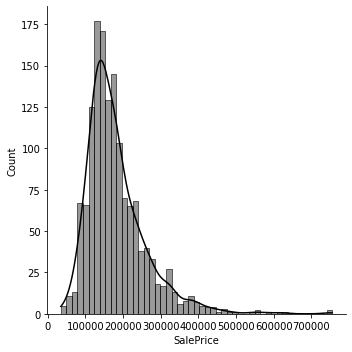

In [19]:
# Plotting Sale price distribution
sns.displot(train['SalePrice'], kde = True, color = 'black', alpha = 0.4 );

The distribution of SalePrice is positively skewed with positive kurtosis. It seems that we'll need to normalize the distribution.

Next, we'll plot the correlation heatmap. 

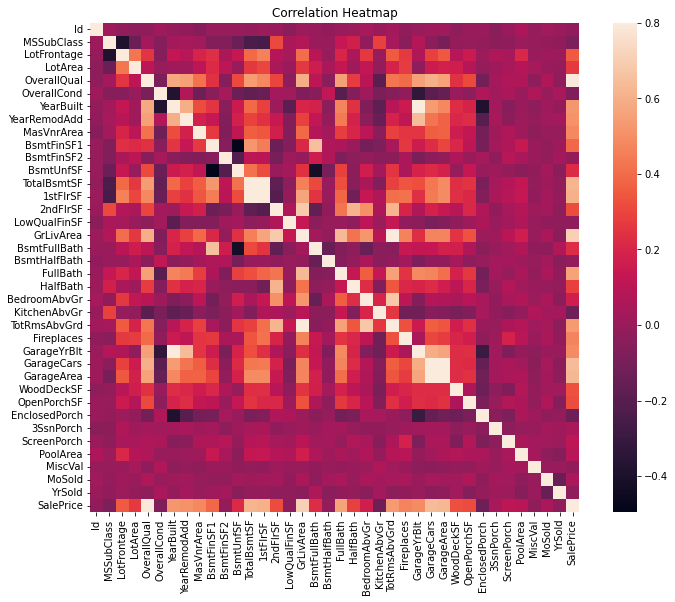

In [20]:
# Correlation matrix
corr_mat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
plt.title("Correlation Heatmap")
sns.heatmap(corr_mat, vmax=.8, square=True);

From the heatmap we can see that TotalBsmtSF and 1stFlrSF have high correlation which indicate multicollinearity. The same case is between GarageArea and GarageCars. Therefore we'll need to drop 1stFlrSF and GarageCars. </br>
Since we already plotted the correlation heatmap, it's worth taking note that OverallQual, GrLiveArea, TotalBsmtSF and GarageArea are strongly correlated with our dependent variable SalePrice. </br> </br>


In [21]:
train_enc.drop(['1stFlrSF'], axis = 1, inplace = True )
train_enc.drop(['GarageCars'], axis = 1, inplace = True )

test_enc.drop(['1stFlrSF'], axis = 1, inplace = True )
test_enc.drop(['GarageCars'], axis = 1, inplace = True )

Now, let's explore more about our correlated variable.

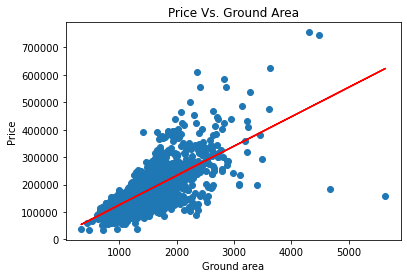

In [22]:
# Plotting the scatter plot of ground area vs sale price

x = train["GrLivArea"]
y = train["SalePrice"]

plt.title('Price Vs. Ground Area')
plt.scatter(x, y)
plt.xlabel("Ground area")
plt.ylabel("Price")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.show()

The graph shows linear relationship between sale price and the ground area.

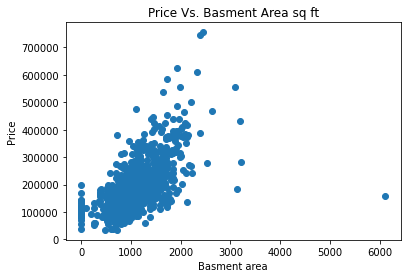

In [23]:
# Plotting the scatter plot of basement area vs sale price

x = train["TotalBsmtSF"]
y = train["SalePrice"]

plt.title('Price Vs. Basment Area sq ft')
plt.scatter(x, y)
plt.xlabel("Basment area")
plt.ylabel("Price")
plt.show()

There is a strong relationship between basement area and the sale price, could be linear or exponential.

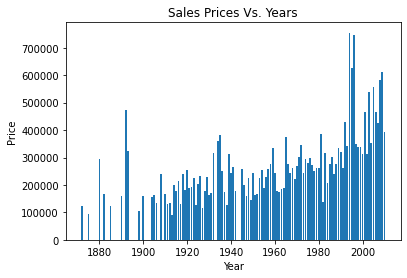

In [24]:
# Plotting sales over the years

plt.title('Sales Prices Vs. Years')
plt.bar(x = train["YearBuilt"], height = train["SalePrice"])
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

It seems that most of the time people tend to spend more on newer houses.

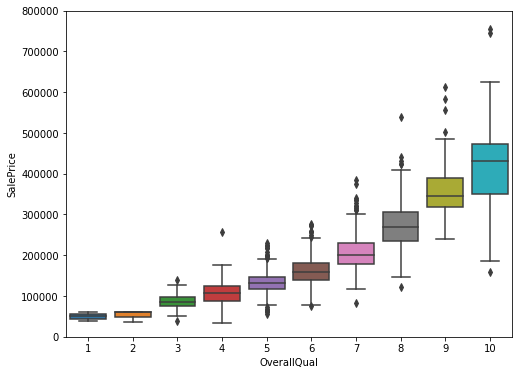

In [25]:
# Plotting a boxplot of the quality (1-10) vs Sale Price

data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Sale price is higher for houses with better overall quality.

Now, it's time to handle outliers. Let's review the sale price Vs Ground area "GrLivrArea". We have to points with higher GrLiveArea that seem abnormal and not following the trend. Therefore we will drop those two entries.

In [26]:
train_enc.sort_values(by = 'GrLivArea', ascending = False)[:2] # check index and Id number

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,0,0,0,0,10,2007,New,Partial,184750


In [27]:
# Drop the rows with outliers using Id number
train_enc = train_enc.drop(train_enc[train_enc['Id'] == 1299].index)
train_enc = train_enc.drop(train_enc[train_enc['Id'] == 524].index)

Since SalePrice is positively skewed, I will apply log transformation to normalize the distribution

In [28]:
train_enc['SalePrice'] = np.log(train_enc['SalePrice']) # Apply log transformation

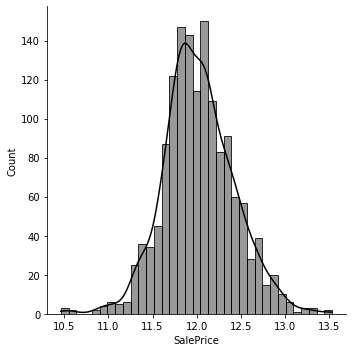

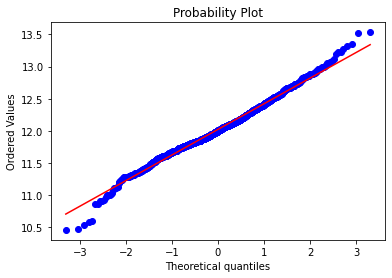

In [29]:
from scipy import stats

# Show distribution after log trasfromation
sns.displot(train_enc['SalePrice'], kde = True, color = 'black', alpha = 0.4);
fig = plt.figure()
res = stats.probplot(train_enc['SalePrice'], plot=plt)

It seems like now we have a normal distribution. This looks much better.</br>
Let's apply the same technique to our strongly correlated variables.

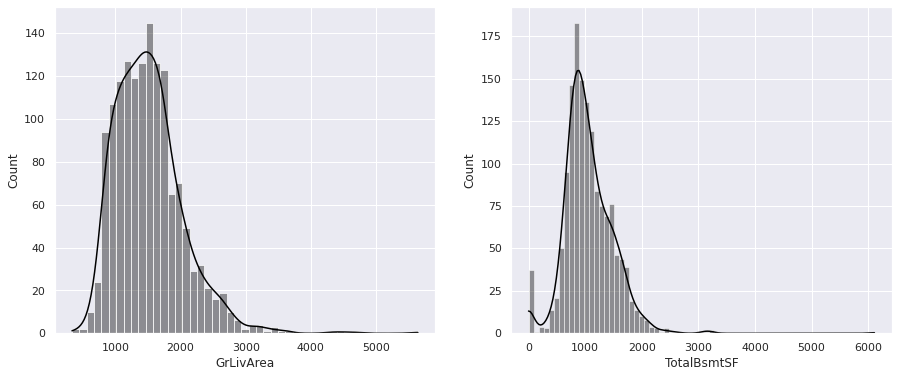

In [30]:
sns.set(rc={'figure.figsize':(15,6)}) # change plot size
fig,axes=plt.subplots(1,2)
sns.histplot(train['GrLivArea'], kde = True, color = 'black', alpha = 0.4, ax=axes[0]); # Ground area distribution
sns.histplot(train['TotalBsmtSF'], kde = True, color = 'black', alpha = 0.4, ax=axes[1]); # Basement area distribution
plt.show()

Both have positive skewness. We'll use log transformation for "GrLivArea". However for "TotalBsmtSF" we can see many values of zero in the plot, which means we cannot use log transformation directly as it will result in infinity values. We'll use np.log1p() which shoud ignore the zeros.

In [31]:
# Apply natural log
train_enc['GrLivArea'] = np.log(train_enc['GrLivArea'])
train_enc['TotalBsmtSF'] = np.log1p(train_enc['TotalBsmtSF'])

test_enc['GrLivArea'] = np.log(test_enc['GrLivArea'])
test_enc['TotalBsmtSF'] = np.log1p(test_enc['TotalBsmtSF'])

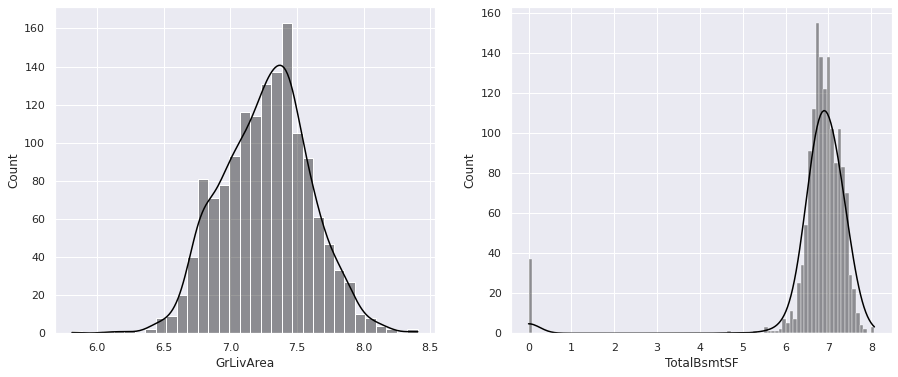

In [32]:
# Show the distibution after log transformation
fig,axes=plt.subplots(1,2)
sns.histplot(train_enc['GrLivArea'], kde = True, color = 'black', alpha = 0.4, ax=axes[0]);
sns.histplot(train_enc['TotalBsmtSF'], kde = True, color = 'black', alpha = 0.4, ax=axes[1]);
plt.show()


We have normalized our important variables. Next, we'll create a variable to keep the numerical features.

In [33]:
# Identify numerical features
numerical_features = train_enc.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop(["Id","SalePrice"])

And now is the time to encode the categorical data. After reading through this article "[Ordinal and One-Hot Encodings for Categorical Data](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)", I decided to proceed with ordinal encoding.

In [34]:
# Import and define the ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [35]:
# Apply ordinal encoding on categorical features in the training and testing sets

train_enc["MSZoning"] = ord_enc.fit_transform(train_enc[["MSZoning"]])
test_enc["MSZoning"] = ord_enc.fit_transform(test_enc[["MSZoning"]])

train_enc["Street"] = ord_enc.fit_transform(train_enc[["Street"]])
test_enc["Street"] = ord_enc.fit_transform(test_enc[["Street"]])


train_enc["LotShape"] = ord_enc.fit_transform(train_enc[["LotShape"]])
test_enc["LotShape"] = ord_enc.fit_transform(test_enc[["LotShape"]])

train_enc["LandContour"] = ord_enc.fit_transform(train_enc[["LandContour"]])
test_enc["LandContour"] = ord_enc.fit_transform(test_enc[["LandContour"]])

train_enc["Utilities"] = ord_enc.fit_transform(train_enc[["Utilities"]])
test_enc["Utilities"] = ord_enc.fit_transform(test_enc[["Utilities"]])

train_enc["LotConfig"] = ord_enc.fit_transform(train_enc[["LotConfig"]])
test_enc["LotConfig"] = ord_enc.fit_transform(test_enc[["LotConfig"]])

train_enc["LandSlope"] = ord_enc.fit_transform(train_enc[["LandSlope"]])
test_enc["LandSlope"] = ord_enc.fit_transform(test_enc[["LandSlope"]])

train_enc["Neighborhood"] = ord_enc.fit_transform(train_enc[["Neighborhood"]])
test_enc["Neighborhood"] = ord_enc.fit_transform(test_enc[["Neighborhood"]])

train_enc["Condition1"] = ord_enc.fit_transform(train_enc[["Condition1"]])
test_enc["Condition1"] = ord_enc.fit_transform(test_enc[["Condition1"]])

train_enc["Condition2"] = ord_enc.fit_transform(train_enc[["Condition2"]])
test_enc["Condition2"] = ord_enc.fit_transform(test_enc[["Condition2"]])

train_enc["BldgType"] = ord_enc.fit_transform(train_enc[["BldgType"]])
test_enc["BldgType"] = ord_enc.fit_transform(test_enc[["BldgType"]])

train_enc["HouseStyle"] = ord_enc.fit_transform(train_enc[["HouseStyle"]])
test_enc["HouseStyle"] = ord_enc.fit_transform(test_enc[["HouseStyle"]])

train_enc["RoofStyle"] = ord_enc.fit_transform(train_enc[["RoofStyle"]])
test_enc["RoofStyle"] = ord_enc.fit_transform(test_enc[["RoofStyle"]])

train_enc["RoofMatl"] = ord_enc.fit_transform(train_enc[["RoofMatl"]])
test_enc["RoofMatl"] = ord_enc.fit_transform(test_enc[["RoofMatl"]])

train_enc["Exterior1st"] = ord_enc.fit_transform(train_enc[["Exterior1st"]])
test_enc["Exterior1st"] = ord_enc.fit_transform(test_enc[["Exterior1st"]])

train_enc["Exterior2nd"] = ord_enc.fit_transform(train_enc[["Exterior2nd"]])
test_enc["Exterior2nd"] = ord_enc.fit_transform(test_enc[["Exterior2nd"]])

train_enc["MasVnrType"] = ord_enc.fit_transform(train_enc[["MasVnrType"]])
test_enc["MasVnrType"] = ord_enc.fit_transform(test_enc[["MasVnrType"]])

train_enc["ExterQual"] = ord_enc.fit_transform(train_enc[["ExterQual"]])
test_enc["ExterQual"] = ord_enc.fit_transform(test_enc[["ExterQual"]])

train_enc["ExterCond"] = ord_enc.fit_transform(train_enc[["ExterCond"]])
test_enc["ExterCond"] = ord_enc.fit_transform(test_enc[["ExterCond"]])

train_enc["Foundation"] = ord_enc.fit_transform(train_enc[["Foundation"]])
test_enc["Foundation"] = ord_enc.fit_transform(test_enc[["Foundation"]])

train_enc["BsmtQual"] = ord_enc.fit_transform(train_enc[["BsmtQual"]])
test_enc["BsmtQual"] = ord_enc.fit_transform(test_enc[["BsmtQual"]])

train_enc["BsmtCond"] = ord_enc.fit_transform(train_enc[["BsmtCond"]])
test_enc["BsmtCond"] = ord_enc.fit_transform(test_enc[["BsmtCond"]])

train_enc["BsmtExposure"] = ord_enc.fit_transform(train_enc[["BsmtExposure"]])
test_enc["BsmtExposure"] = ord_enc.fit_transform(test_enc[["BsmtExposure"]])

train_enc["BsmtFinType1"] = ord_enc.fit_transform(train_enc[["BsmtFinType1"]])
test_enc["BsmtFinType1"] = ord_enc.fit_transform(test_enc[["BsmtFinType1"]])

train_enc["BsmtFinType2"] = ord_enc.fit_transform(train_enc[["BsmtFinType2"]])
test_enc["BsmtFinType2"] = ord_enc.fit_transform(test_enc[["BsmtFinType2"]])

train_enc["Heating"] = ord_enc.fit_transform(train_enc[["Heating"]])
test_enc["Heating"] = ord_enc.fit_transform(test_enc[["Heating"]])

train_enc["HeatingQC"] = ord_enc.fit_transform(train_enc[["HeatingQC"]])
test_enc["HeatingQC"] = ord_enc.fit_transform(test_enc[["HeatingQC"]])

train_enc["CentralAir"] = ord_enc.fit_transform(train_enc[["CentralAir"]])
test_enc["CentralAir"] = ord_enc.fit_transform(test_enc[["CentralAir"]])

train_enc["Electrical"] = ord_enc.fit_transform(train_enc[["Electrical"]])
test_enc["Electrical"] = ord_enc.fit_transform(test_enc[["Electrical"]])

train_enc["KitchenQual"] = ord_enc.fit_transform(train_enc[["KitchenQual"]])
test_enc["KitchenQual"] = ord_enc.fit_transform(test_enc[["KitchenQual"]])

train_enc["Functional"] = ord_enc.fit_transform(train_enc[["Functional"]])
test_enc["Functional"] = ord_enc.fit_transform(test_enc[["Functional"]])

train_enc["GarageType"] = ord_enc.fit_transform(train_enc[["GarageType"]])
test_enc["GarageType"] = ord_enc.fit_transform(test_enc[["GarageType"]])

train_enc["GarageFinish"] = ord_enc.fit_transform(train_enc[["GarageFinish"]])
test_enc["GarageFinish"] = ord_enc.fit_transform(test_enc[["GarageFinish"]])

train_enc["GarageQual"] = ord_enc.fit_transform(train_enc[["GarageQual"]])
test_enc["GarageQual"] = ord_enc.fit_transform(test_enc[["GarageQual"]])

train_enc["GarageCond"] = ord_enc.fit_transform(train_enc[["GarageCond"]])
test_enc["GarageCond"] = ord_enc.fit_transform(test_enc[["GarageCond"]])

train_enc["PavedDrive"] = ord_enc.fit_transform(train_enc[["PavedDrive"]])
test_enc["PavedDrive"] = ord_enc.fit_transform(test_enc[["PavedDrive"]])

train_enc["SaleType"] = ord_enc.fit_transform(train_enc[["SaleType"]])
test_enc["SaleType"] = ord_enc.fit_transform(test_enc[["SaleType"]])

train_enc["SaleCondition"] = ord_enc.fit_transform(train_enc[["SaleCondition"]])
test_enc["SaleCondition"] = ord_enc.fit_transform(test_enc[["SaleCondition"]])

Let's verify the encodings.

In [36]:
train_enc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,...,0,0,0,0,0,2,2008,8.0,4.0,12.247694
1,2,20,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,...,0,0,0,0,0,5,2007,8.0,4.0,12.109011
2,3,60,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,...,0,0,0,0,0,9,2008,8.0,4.0,12.317167
3,4,70,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,...,272,0,0,0,0,2,2006,8.0,0.0,11.849398
4,5,60,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,...,0,0,0,0,0,12,2008,8.0,4.0,12.429216


In [37]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   float64
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   float64
 6   LotShape       1458 non-null   float64
 7   LandContour    1458 non-null   float64
 8   Utilities      1458 non-null   float64
 9   LotConfig      1458 non-null   float64
 10  LandSlope      1458 non-null   float64
 11  Neighborhood   1458 non-null   float64
 12  Condition1     1458 non-null   float64
 13  Condition2     1458 non-null   float64
 14  BldgType       1458 non-null   float64
 15  HouseStyle     1458 non-null   float64
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

We don't have objects anymore 

In [38]:
train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [39]:
train_enc["MSZoning"].value_counts()

3.0    1149
4.0     218
1.0      65
2.0      16
0.0      10
Name: MSZoning, dtype: int64

In the next code block I will create new features. the features described by grade represent will combine quality and condition. While the features described by score relate the area with the condition.

In [40]:
# Grade features
train_enc["HouseGrade"] = train_enc["OverallQual"] * train_enc["OverallCond"]
train_enc["ExterGrade"] = train_enc["ExterQual"] * train_enc["ExterCond"]
train_enc["BsmtGrade"] = train_enc["BsmtQual"] * train_enc["BsmtCond"]
train_enc["GarageGrade"] = train_enc["GarageQual"] * train_enc["GarageCond"]
train_enc["OverallGrade"] = train_enc[["HouseGrade", "ExterGrade", "BsmtGrade", "GarageGrade"]].mean(axis=1)

# Score features
train_enc["HouseScore"] = train_enc["HouseGrade"] * train_enc["GrLivArea"]
train_enc["KitchenScore"] = train_enc["KitchenAbvGr"] * train_enc["KitchenQual"]
train_enc["BsmtScore"] = train_enc["BsmtGrade"] * train_enc["TotalBsmtSF"]
train_enc["GarageScore"] = train_enc["GarageGrade"] * train_enc["GarageArea"]
train_enc["OverallScore"] = train_enc[["HouseScore", "KitchenScore", "BsmtScore", "GarageScore"]].mean(axis=1)

In [41]:
train_enc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,HouseGrade,ExterGrade,BsmtGrade,GarageGrade,OverallGrade,HouseScore,KitchenScore,BsmtScore,GarageScore,OverallScore
0,1,60,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,...,35,8.0,8.0,25.0,19.00,260.548703,2.0,54.027503,13700.0,3504.144052
1,2,20,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,...,48,12.0,8.0,25.0,23.25,342.741746,3.0,57.129961,11500.0,2975.717927
2,3,60,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,...,35,8.0,8.0,25.0,19.00,262.070682,2.0,54.603680,15200.0,3879.668590
3,4,70,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,...,35,12.0,4.0,25.0,19.00,260.691685,2.0,26.517453,16050.0,4084.802285
4,5,60,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,...,40,8.0,8.0,25.0,20.25,307.812125,2.0,56.352263,20900.0,5316.541097


Create the same features for the test set

In [42]:
# Grade features
test_enc["HouseGrade"] = test_enc["OverallQual"] * test_enc["OverallCond"]
test_enc["ExterGrade"] = test_enc["ExterQual"] * test_enc["ExterCond"]
test_enc["BsmtGrade"] = test_enc["BsmtQual"] * test_enc["BsmtCond"]
test_enc["GarageGrade"] = test_enc["GarageQual"] * test_enc["GarageCond"]
test_enc["OverallGrade"] = test_enc[["HouseGrade", "ExterGrade", "BsmtGrade", "GarageGrade"]].mean(axis=1)

# Score features
test_enc["HouseScore"] = test_enc["HouseGrade"] * test_enc["GrLivArea"]
test_enc["KitchenScore"] = test_enc["KitchenAbvGr"] * test_enc["KitchenQual"]
test_enc["BsmtScore"] = test_enc["BsmtGrade"] * test_enc["TotalBsmtSF"]
test_enc["GarageScore"] = test_enc["GarageGrade"] * test_enc["GarageArea"]
test_enc["OverallScore"] = test_enc[["HouseScore", "KitchenScore", "BsmtScore", "GarageScore"]].mean(axis=1)

In [43]:
test_enc.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,HouseGrade,ExterGrade,BsmtGrade,GarageGrade,OverallGrade,HouseScore,KitchenScore,BsmtScore,GarageScore,OverallScore
0,1461,20,2.0,80.0,11622,1.0,3.0,3.0,0.0,4.0,...,30,12.0,16.0,20.0,19.50,203.938212,3.0,108.533203,14600.0,3728.867854
1,1462,20,3.0,81.0,14267,1.0,0.0,3.0,0.0,0.0,...,36,12.0,16.0,20.0,21.00,258.918554,2.0,115.086948,6240.0,1654.001375
2,1463,60,3.0,74.0,13830,1.0,0.0,3.0,0.0,4.0,...,25,12.0,8.0,20.0,16.25,184.893040,3.0,54.672870,9640.0,2470.641478
3,1464,60,3.0,78.0,9978,1.0,0.0,3.0,0.0,4.0,...,36,12.0,16.0,20.0,21.00,265.689208,2.0,109.311257,9400.0,2444.250116
4,1465,120,3.0,43.0,5005,1.0,0.0,1.0,0.0,4.0,...,40,8.0,8.0,20.0,19.00,286.184614,2.0,57.243170,10120.0,2616.356946


Lastly, I will scale the numerical data.

In [44]:
# Import standard scaler to scale our numerical features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train_enc.loc[:, numerical_features] = sc.fit_transform(train_enc.loc[:, numerical_features])
test_enc.loc[:, numerical_features] = sc.fit_transform(test_enc.loc[:, numerical_features])

## Model Development

Let's start the model development by seperating features and targets into X and y.

In [45]:
# Seperate the features and the targets into x and y
X = train_enc.drop(["Id","SalePrice"], axis = 1)
y = train_enc["SalePrice"]

Next, we'll use train_test_split from sklearn to divide train_enc into 90% for training and 10% for testing 

In [46]:
# Split the data to assess the model
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.1, random_state=20)

Let's define the RMSE metric to evaluate the models

In [47]:
from sklearn.metrics import mean_squared_error, make_scorer

# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, x_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

### Model 1
For model 1, I am using a simple linear regression model

In [48]:
# Define the model
from sklearn import linear_model


model_1 = linear_model.LinearRegression()
model_1.fit(x_train, y_train)


# Check RMSE and model score
print("RMSE on Training set :", rmse_cv_train(model_1).mean())
print("RMSE on Test set :", rmse_cv_test(model_1).mean())
print(" Model score :",model_1.score(x_train, y_train))

RMSE on Training set : 0.1270844223111019
RMSE on Test set : 0.20343753568800843
 Model score : 0.9172191921416989


### Model 2
For model 2, I am using a XGboost for regression. The code for parameters tuning can be found in the end of this notebook.  

In [49]:
import xgboost as xg

model_2 = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 90, max_depth = 3, eta = 0.15, alpha = 0.15)
model_2.fit(x_train, y_train)


#check RMSE and model score
print("RMSE on Training set :", rmse_cv_train(model_2).mean())
print("RMSE on Test set :", rmse_cv_test(model_2).mean())
print(" Model score :",model_2.score(x_train, y_train))

RMSE on Training set : 0.1257302022550408
RMSE on Test set : 0.15594718264541263
 Model score : 0.9579813153848058


### Model 3
Model 3 is Ridge regression. several alpha values are provided. the model will identify the best alpha using cross-validation.

In [50]:
from sklearn.linear_model import RidgeCV

model_3 = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100])
model_3.fit(x_train, y_train)

#check RMSE and model score
print("RMSE on Training set :", rmse_cv_train(model_3).mean())
print("RMSE on Test set :", rmse_cv_test(model_3).mean())
print(" Model score :",model_3.score(x_train, y_train))

RMSE on Training set : 0.1261646237460688
RMSE on Test set : 0.12502352063798172
 Model score : 0.9165259527613627


### Model 4
Model 4 is Lasso regression. The code for parameters tuning can be found in the end of this notebook. 

In [51]:
from sklearn.linear_model import Lasso

model_4 = Lasso(alpha = 0.001, max_iter = 10500)
model_4.fit(x_train, y_train)

#check RMSE and model score
print("RMSE on Training set :", rmse_cv_train(model_4).mean())
print("RMSE on Test set :", rmse_cv_test(model_4).mean())
print(" Model score :",model_4.score(x_train, y_train))

RMSE on Training set : 0.12511853712275714
RMSE on Test set : 0.12764501017509577
 Model score : 0.9143138274106343


### Model 5
Model 5 is ElasticNet. The code for parameters tuning can be found in the end of this notebook. 

In [52]:
from sklearn.linear_model import ElasticNet

model_5 = ElasticNet(alpha = 0.001, max_iter = 15000)

model_5.fit(x_train, y_train)

#check RMSE and model score
print("RMSE on Training set :", rmse_cv_train(model_5).mean())
print("RMSE on Test set :", rmse_cv_test(model_5).mean())
print(" Model score :",model_5.score(x_train, y_train))

RMSE on Training set : 0.1256893837483532
RMSE on Test set : 0.13301191346098726
 Model score : 0.9161066244322681


## Preparing for submission 

First we need to apply some changes so that the testing set is organized just like the training set.

In [53]:
# Drop the Id column so that we have the same features used for training
test_enc = test_enc.drop(["Id"], axis = 1)
test_enc.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,HouseGrade,ExterGrade,BsmtGrade,GarageGrade,OverallGrade,HouseScore,KitchenScore,BsmtScore,GarageScore,OverallScore
0,-0.874711,2.0,0.552396,0.363929,1.0,3.0,3.0,0.0,4.0,0.0,...,30,12.0,16.0,20.0,19.50,203.938212,3.0,108.533203,14600.0,3728.867854
1,-0.874711,3.0,0.601046,0.897861,1.0,0.0,3.0,0.0,0.0,0.0,...,36,12.0,16.0,20.0,21.00,258.918554,2.0,115.086948,6240.0,1654.001375
2,0.061351,3.0,0.260492,0.809646,1.0,0.0,3.0,0.0,4.0,0.0,...,25,12.0,8.0,20.0,16.25,184.893040,3.0,54.672870,9640.0,2470.641478
3,0.061351,3.0,0.455095,0.032064,1.0,0.0,3.0,0.0,4.0,0.0,...,36,12.0,16.0,20.0,21.00,265.689208,2.0,109.311257,9400.0,2444.250116
4,1.465443,3.0,-1.247675,-0.971808,1.0,0.0,1.0,0.0,4.0,0.0,...,40,8.0,8.0,20.0,19.00,286.184614,2.0,57.243170,10120.0,2616.356946


Check for the remaining missing data.

In [54]:
# Display the missing values in the testing set
missing_test = pd.DataFrame(test_enc.isnull().sum().sort_values(ascending = False))
percentage_test = pd.DataFrame(test_enc.isnull().sum()/test_enc.isnull().count().sort_values(ascending = False))
missing_data_test = pd.concat([missing_test, percentage_test], axis = 1, keys = ['Missing values', "Percentage"])
missing_data_test.head(25)

,Missing values,Percentage
,0,0
MSZoning,4,0.002742
BsmtFullBath,2,0.001371
Utilities,2,0.001371
Functional,2,0.001371
BsmtHalfBath,2,0.001371
SaleType,1,0.000685
KitchenQual,1,0.000685
TotalBsmtSF,1,0.000685
BsmtUnfSF,1,0.000685


The remaining missing values in the test set have small percentages. I'll just fill the null values with the mean. This should not affect the model. 

In [55]:
# Fill the missing values with mean values
test_enc = test_enc.fillna(test_enc.mean())

Getting the Sale price predictions for the testing set and creating a table of the data needed for submission. Note that natural log was used on the sale prices in the training set. To reverse that I used the exponential function. 

In [56]:
# Get the predictions, inverse log transformation and list them in a dataframe.   
prediction_sub = model_5.predict(test_enc)
sub_data = {"Id": test.Id, "SalePrice": np.exp(prediction_sub)} # np.exp() inverse np.log()
sub_df = pd.DataFrame(sub_data)

Let's have a final look.

In [57]:
# Check the format 
sub_df.head()

,Id,SalePrice
0,1461,123133.533479
1,1462,161086.346643
2,1463,183284.248561
3,1464,198625.501291
4,1465,183569.131019


Generating CSV file for submission.

In [58]:
# Create the CSV file for submission
sub_df.to_csv(r"/kaggle/working/submission.csv", index = False)

### Tuning hyperparameters 
This is the code i tune the hyperparameters for my models using grid search. 

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

First I created pipelines for each model

In [60]:
# pipeline for xgboost regressor
pipeline_XGBR = Pipeline([
    ('scaler', StandardScaler()),
    ('model', xg.XGBRegressor())
])

# pipeline for Lasso
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

# pipeline for ElasticNet
pipeline_ENet = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet())
])

Preparing GridsearchCV parameters. 

In [61]:
# Grid search for XGboost regressor
search_XGBR = GridSearchCV(pipeline_XGBR,
                          {'model__alpha': np.arange(0.0, 0.5, 0.05),
                           "model__n_estimators" : np.arange(10, 100, 10),  
                           "model__learning_rate"    : np.arange(0.05, 0.3, 0.05),
                           "model__max_depth"    : np.arange(3, 10, 1)
                          },
                          cv = 3,
                          scoring = 'neg_mean_squared_error',
                          verbose = 3
                          )

# Grid search for Lasso
search_lasso = GridSearchCV(pipeline_lasso,
                          {'model__alpha': np.arange(0.001, 20, 0.10),
                           'model__max_iter' : np.arange(500, 10500, 1000),
                           'model__tol' : np.arange(0, 1, 0.1)},
                          cv = 3,
                          scoring = 'neg_mean_squared_error',
                          verbose = 3
                          )

# Grid search for XGboost ElasticNet
search_ENet = GridSearchCV(pipeline_ENet,
                          {'model__alpha': np.arange(0.001, 20, 0.10),
                           'model__max_iter' : np.arange(500, 10500, 1000),
                           'model__tol' : np.arange(0, 1, 0.1)},
                          cv = 3,
                          scoring = 'neg_mean_squared_error',
                          verbose = 3
                          )

Finding the parameters for XGBoost regressor.

In [62]:
#search_XGBR.fit(x_train, y_train)

In [63]:
# Check the best parameters
#search_XGBR.best_params_

Finding alpha for Lasso regression 

In [64]:
#search_lasso.fit(x_train, y_train)

In [65]:
# Check the best parameters
#search_lasso.best_params_

Finding alpha for ElasticNet.

In [66]:
#search_ENet.fit(x_train, y_train)

In [67]:
# Check the best parameters
#search_ENet.best_params_

## Conclusion
The best solution was achieved using Lasso regression (RMSE = 0.13577). Moreover, XGboost regressor, Lasso and ElasticNet all performed will and achieved almost similar RMSE scores. Any suggestions on how to improve the score would be highly appreciated.